In [1]:
import torch
from model import UNet
from utils import show_result, eval_segmentation_metrics, evaluate_metrics
from config import LR
from dataloader import val_loader

d:\miniconda\envs\torch_learning\lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
d:\miniconda\envs\torch_learning\lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
checkpoint = torch.load(r'J:\ML_for_porfolio\segmentation\unet_rsna\checkpoints\best_one.pth', map_location=device)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12144\2257435162.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'J:\ML_for_porfolio\segmentation\un

In [4]:
model = UNet()
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

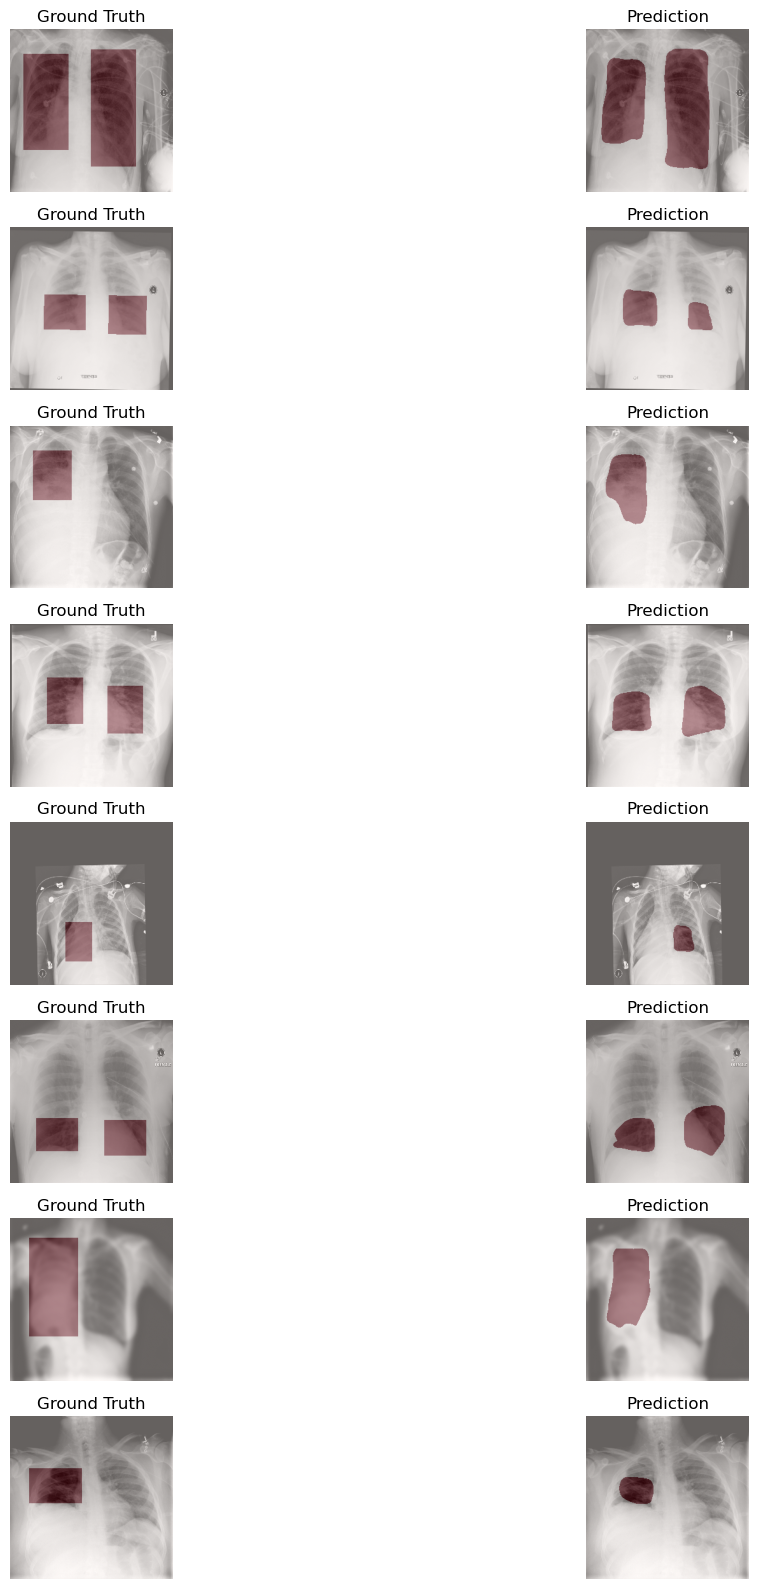

In [5]:
show_result(val_loader,model,device)

### Compare different thresholds to import F1-score

In [6]:
eval_segmentation_metrics(val_loader, model, device, threshold=0.5)

Estimating...: 100%|██████████| 76/76 [01:35<00:00,  1.26s/it]

Precision: 0.7160
Recall:    0.7916
F1-score:  0.7519


In [7]:
eval_segmentation_metrics(val_loader, model, device, threshold=0.6)

Estimating...: 100%|██████████| 76/76 [01:29<00:00,  1.17s/it]

Precision: 0.7225
Recall:    0.7819
F1-score:  0.7511


In [8]:
eval_segmentation_metrics(val_loader, model, device, threshold=0.4)

Estimating...: 100%|██████████| 76/76 [01:28<00:00,  1.17s/it]

Precision: 0.7074
Recall:    0.8016
F1-score:  0.7516


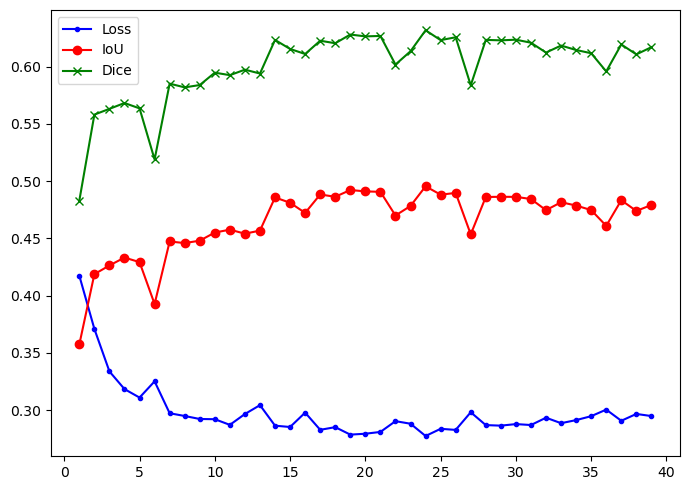

In [6]:
evaluate_metrics()